In [1]:
sc

''

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext

In [3]:
sc =SparkContext()
spark = SQLContext(sc)

In [4]:
df1 = spark.read.csv("project\BDA\pseudo_facebook.csv", inferSchema=True, header=True)

In [43]:
df1.show(5)

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2094382| 14|     19|    1999|       11|  male|   266|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1192601| 14|      2|    1999|       11|female|     6|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2083884| 14|     16|    1999|       11|  male|    13|           0|                    0|    0|             0|           0|  

In [6]:
df2 = df1.toPandas()

In [7]:
df1.printSchema()

root
 |-- userid: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob_day: integer (nullable = true)
 |-- dob_year: integer (nullable = true)
 |-- dob_month: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- friend_count: integer (nullable = true)
 |-- friendships_initiated: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- likes_received: integer (nullable = true)
 |-- mobile_likes: integer (nullable = true)
 |-- mobile_likes_received: integer (nullable = true)
 |-- www_likes: integer (nullable = true)
 |-- www_likes_received: integer (nullable = true)



In [8]:
df2

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198001,1268299,68,4,1945,4,female,541,2118,341,3996,18089,3505,11887,491,6202
198002,1256153,18,12,1995,3,female,21,1968,1720,4401,13412,4399,10592,2,2820
198003,1195943,15,10,1998,5,female,111,2002,1524,11959,12554,11959,11462,0,1092
198004,1468023,23,11,1990,4,female,416,2560,185,4506,6516,4506,5760,0,756


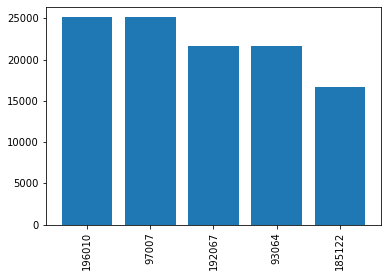

In [9]:
#mycolors=np.array(['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'])
k=df2[['userid','likes']].reset_index()
k['likes'].sort_values(ascending=False)[:5].plot(kind='bar', width=0.8)

Users with most likes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235026A8FD0>,
      dtype=object)

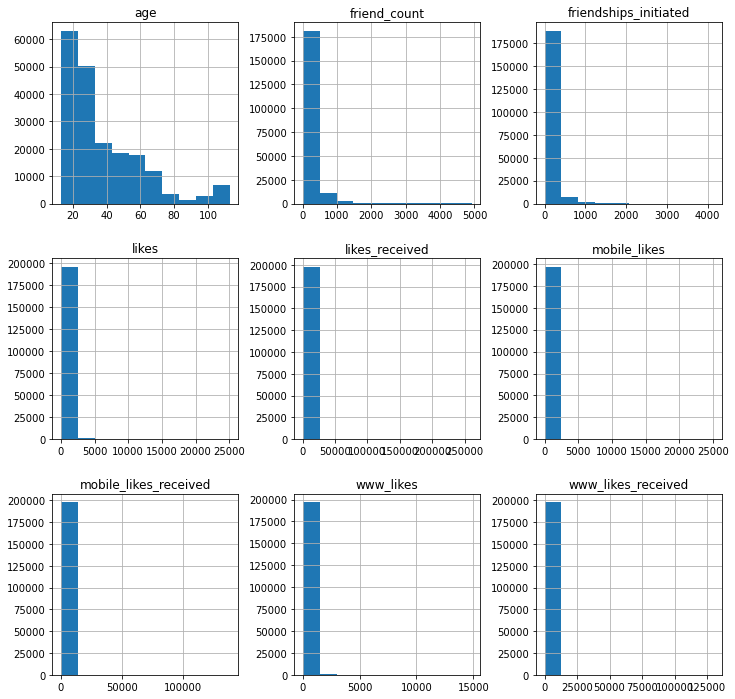

In [10]:
forhist=['age','friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes','www_likes_received','tenure']
fb_subset1=pd.DataFrame(df2[forhist])
fb_subset1.hist(figsize=(12,12))

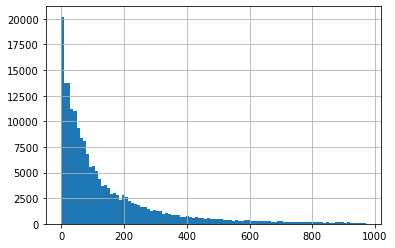

In [11]:
import numpy as numpy

def rem_out(elements):
    mean = numpy.mean(elements, axis=0)
    sd = numpy.std(elements, axis=0)
    final_list = [x for x in elements if (x > mean - 2 * sd)]
    final_list = [x for x in final_list if (x < mean + 2 * sd)]
    return final_list

pd.Series(rem_out(fb_subset1['friend_count'])).hist(bins=100)

In [12]:
df2[['friend_count','userid']].sort_values(by='friend_count', ascending = False)[:5].set_index('userid')

,friend_count
userid,
2090699,4923
2090699,4923
1660276,4917
1660276,4917
1926655,4863


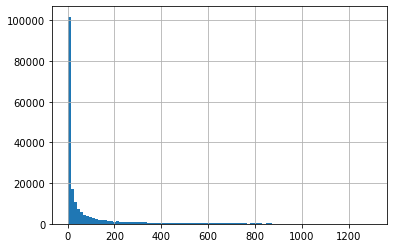

In [13]:
Generic_likes=rem_out(df2['likes'])
pd.Series(Generic_likes).hist(bins=100)

In [14]:
import seaborn as sns # just a conventional alias, don't know why

In [15]:
# Remove object column in dataframe to use heatmap (Gender here)
cols=['age','tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received', 'mobile_likes', 'mobile_likes_received',
       'www_likes', 'www_likes_received']
fb_hm=df2[cols]
fb_hm=fb_hm.fillna(0)
# sns.heatmap(features.drop(['columnName01_OfTypeObject','columnName02_OfTypeObject'],axis=1)

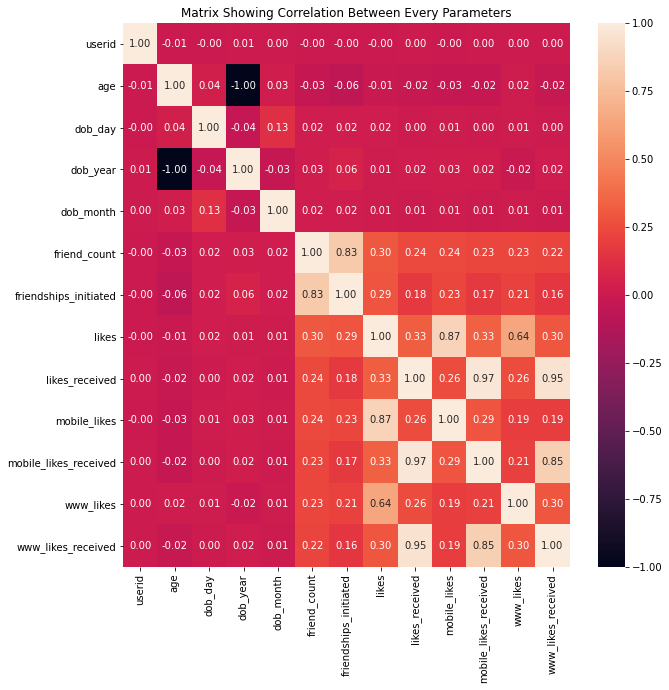

In [16]:
plt.figure(figsize=(10,10))
ax = plt.axes()
corr = df2.corr()
sns.heatmap(corr, fmt='.2f', annot=True)
ax.set_title('Matrix Showing Correlation Between Every Parameters')
plt.show()

Text(114.0, 0.5, 'Months')

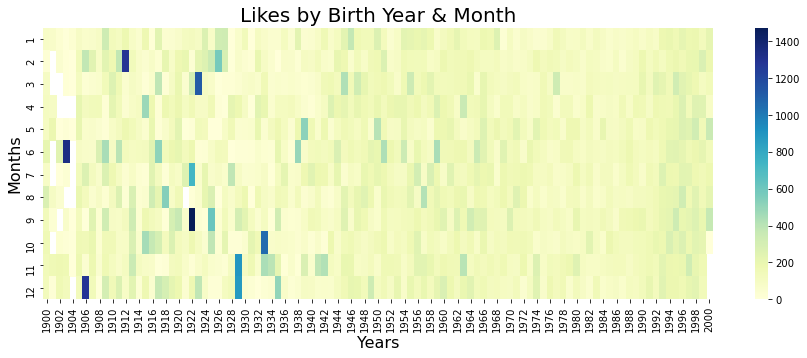

In [42]:
fb_likes = pd.pivot_table(df2,index='dob_month', columns='dob_year',values= 'likes', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes,ax=ax,cmap ="YlGnBu")
ax.set_title('Likes by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

In [20]:
fb_yearwise=df2[['dob_year','userid']].drop_duplicates().sort_values(by='dob_year')

In [21]:
fb_yearwise=fb_yearwise.reset_index()
fb_yearwise.head(2)

,index,dob_year,userid
0,45453,1900,1708305
1,55697,1900,1591019


In [22]:
fb_yearwise=fb_yearwise.groupby(['dob_year'])[['userid']].agg('count')
fb_yearwise.columns=['No. of Users']

Text(0.5, 1.0, 'Total no. of Users w.r.t birth year')

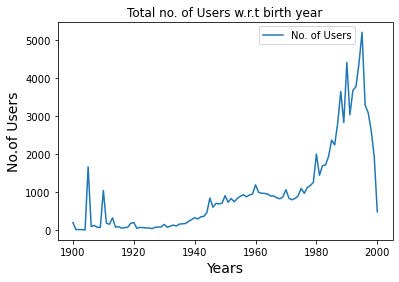

In [23]:
fb_yearwise.plot(kind='line')
plt.legend(loc=(0.60,0.9))
plt.xlabel("Years", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Total no. of Users w.r.t birth year")

Text(0.5, 1.0, 'Age wise distribution of Users')

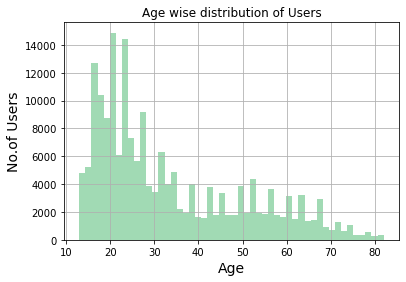

In [25]:
age=pd.Series(rem_out(df2['age']))
age.hist(bins=50, color='#a1dab4')
plt.xlabel("Age", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Age wise distribution of Users")

In [27]:
model_columns=['age', 'dob_day', 'dob_year', 'dob_month', 'gender',
       'tenure', 'friend_count', 'friendships_initiated', 'likes',
       'likes_received']
fb_model=df2.dropna()

In [28]:
categorical_columns = ['gender']
f=['age',
       'tenure', 'friend_count', 'friendships_initiated',
       'likes_received']
formula = '{}'.format(' + '.join(['C({})'.format(x) for x in categorical_columns]))
m = 'likes ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in f]))

In [29]:
n=m+'+'+formula
n

'likes ~ 0 + Q("age") + Q("tenure") + Q("friend_count") + Q("friendships_initiated") + Q("likes_received")+C(gender)'

In [30]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices(n, data=fb_model, return_type='dataframe')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print (result.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     14.84
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:07:26   Log-Likelihood:            -1.0590e+06
No. Observations:              138604   AIC:                         2.123e+06
Df Residuals:                  136181   BIC:                         2.147e+06
Df Model:                        2422                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Q("tenure")[0]      

In [33]:
from sklearn import metrics
prediction = pd.DataFrame(model.fit().predict(X_test))

In [34]:
Results=y_test.merge(prediction, left_index=True, right_index=True)

In [37]:
from math import sqrt
from statistics import *
MAPE = sqrt(mean(abs(Results[0]-Results['likes'])**2))

In [38]:
Results=Results.reset_index()[['likes',0]]
Results.columns=['Actual','Predicted']

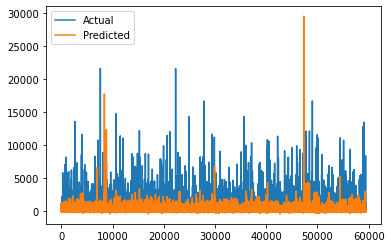

In [40]:
Results.plot(kind='line')